# Adversarial Attack

In [1]:
from auxiliar_code import *

Using TensorFlow backend.


### Load and show Images

In [2]:
original_image = load_image("water_bottle.jpg")
hacked_image = load_image("hacked_water.png")

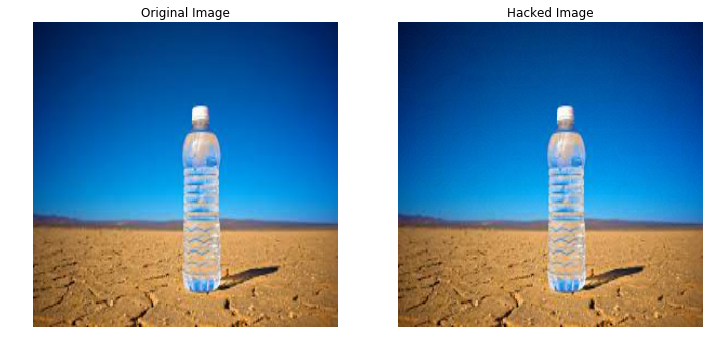

In [3]:
plot_images_contrast(original_image, hacked_image)

### Load Inception Neural Network

In [4]:
nn = load_neural_network("inception")

### Predict

In [5]:
predict(nn, original_image)

water_bottle


In [6]:
predict(nn, hacked_image)

beer_glass


### Explanation

#### Class to attack

In [ ]:
target_class = 441 # Beer Glass Class
# Classes: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

#### Gradients and Loss Function

In [7]:
im = preprocess_image(original_image)

inp_layer = nn.layers[0].input # Image
out_layer = nn.layers[-1].output # Probabilities

loss = out_layer[0, target_class]
grad = K.gradients(loss, inp_layer)[0]
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

#### Create the Adversarial Image

In [8]:
certainty = 0.0

# Adv image should be similar to the original
max_pert = im + 0.01
min_pert = im - 0.01

adv = np.copy(im)

while certainty < 0.95:
    gr, certainty = optimize_gradient([adv, 0])
    adv += gr
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1 , 1)
    print("Certainty Degree", certainty)

Certainty Degree 9.625923e-05
Certainty Degree 9.788212e-05
Certainty Degree 9.952395e-05
Certainty Degree 0.00010118422
Certainty Degree 0.00010290054
Certainty Degree 0.00010468772
Certainty Degree 0.00010653462
Certainty Degree 0.00010842558
Certainty Degree 0.000110317145
Certainty Degree 0.00011219464
Certainty Degree 0.000114090435
Certainty Degree 0.000116017385
Certainty Degree 0.000117974436
Certainty Degree 0.000119983524
Certainty Degree 0.000122034035
Certainty Degree 0.00012410384
Certainty Degree 0.00012624147
Certainty Degree 0.00012841231
Certainty Degree 0.00013059842
Certainty Degree 0.00013279326
Certainty Degree 0.00013500046
Certainty Degree 0.00013725461
Certainty Degree 0.00013958917
Certainty Degree 0.00014199049
Certainty Degree 0.00014441062
Certainty Degree 0.00014682316
Certainty Degree 0.00014925798
Certainty Degree 0.00015171776
Certainty Degree 0.00015420865
Certainty Degree 0.00015676045
Certainty Degree 0.00015934036
Certainty Degree 0.00016197223
Certa

### Trick Summary

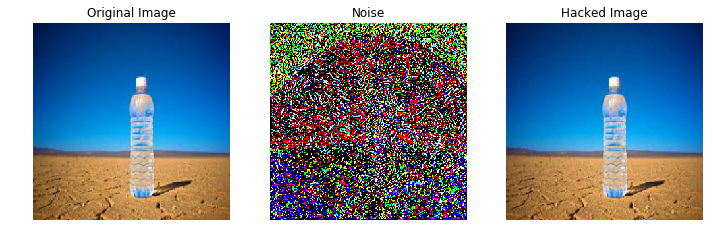

In [23]:
im = denormalise(im.reshape(im.shape[1], im.shape[2], im.shape[3]))
adv = denormalise(adv.reshape(adv.shape[1], adv.shape[2], adv.shape[3]))
plot_images_noise(im, adv)

## Save the Adv Image

In [24]:
# It would be recommended to point the NN hacked
matplotlib.image.imsave('hacked_water_inception.png', adv)

## Try again

In [25]:
decode_predictions(nn.predict(preprocess_input(adv.reshape(1, adv.shape[0], adv.shape[1], adv.shape[2]))))

[[('n02823750', 'beer_glass', 0.99882895),
  ('n02823428', 'beer_bottle', 0.0006646357),
  ('n02815834', 'beaker', 7.791003e-05),
  ('n03443371', 'goblet', 7.453721e-05),
  ('n03983396', 'pop_bottle', 4.9831186e-05)]]